In [3]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.metrics import MeanSquaredError
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

### Data Loading

In [4]:
from frameworks.api.NN_api import pd
from frameworks.api.NN_api import load_data

# Path to the Data sets
path_to_monks = '/data/monks/'

# Load the Training sets into pandas DataFrames
df_train1 = load_data(path_to_monks+'monks-1.train')
df_train2 = load_data(path_to_monks+'monks-2.train')
df_train3 = load_data(path_to_monks+'monks-3.train')

# Load the Test sets into pandas DataFrames
df_test1 = load_data(path_to_monks+'monks-1.test')
df_test2 = load_data(path_to_monks+'monks-2.test')
df_test3 = load_data(path_to_monks+'monks-3.test')

ModuleNotFoundError: No module named 'frameworks'

### Display the loaded data

In [ ]:
df_train1.head()

,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,3,1,data_5
NaN,1,1,1,1,1,3,2,data_6
NaN,1,1,1,1,3,2,1,data_19
NaN,1,1,1,1,3,3,2,data_22
NaN,1,1,1,2,1,2,1,data_27


In [ ]:
df_train2.head()

,target,col1,col2,col3,col4,col5,col6,id
NaN,0,1,1,1,1,2,2,data_4
NaN,0,1,1,1,1,4,1,data_7
NaN,0,1,1,1,2,1,1,data_9
NaN,0,1,1,1,2,1,2,data_10
NaN,0,1,1,1,2,2,1,data_11


In [ ]:
df_train3.head()

,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,1,2,data_2
NaN,1,1,1,1,1,2,1,data_3
NaN,1,1,1,1,1,2,2,data_4
NaN,0,1,1,1,1,3,1,data_5
NaN,0,1,1,1,1,4,1,data_7


In [ ]:
df_test1.head()

,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,1,1,data_1
NaN,1,1,1,1,1,1,2,data_2
NaN,1,1,1,1,1,2,1,data_3
NaN,1,1,1,1,1,2,2,data_4
NaN,1,1,1,1,1,3,1,data_5


In [ ]:
df_test2.head()

,target,col1,col2,col3,col4,col5,col6,id
NaN,0,1,1,1,1,1,1,data_1
NaN,0,1,1,1,1,1,2,data_2
NaN,0,1,1,1,1,2,1,data_3
NaN,0,1,1,1,1,2,2,data_4
NaN,0,1,1,1,1,3,1,data_5


In [ ]:
df_test3.head()

,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,1,1,data_1
NaN,1,1,1,1,1,1,2,data_2
NaN,1,1,1,1,1,2,1,data_3
NaN,1,1,1,1,1,2,2,data_4
NaN,1,1,1,1,1,3,1,data_5


### Data Split

In [ ]:
from frameworks.api.NN_api import split_data

# Splits the TR sets into datas and labels
x_train1, y_train1 = split_data(df_train1)
x_train2, y_train2 = split_data(df_train2)
x_train3, y_train3 = split_data(df_train3)

# Splits the TS sets into datas and labels
x_test1, y_test1 = split_data(df_test1)
x_test2, y_test2 = split_data(df_test2)
x_test3, y_test3 = split_data(df_test3)

(x_train1, y_train1)

ImportError: cannot import name 'split_data' from 'frameworks.api.NN_api' (/Users/gianlucapanzani/Documents/GitHub/Machine_Learning_Project/frameworks/tfkeras/../../frameworks/api/NN_api.py)

### 1-Hot Encoding

In [ ]:
# Initializing the one-hot DataFrame
df_copy = df.copy(deep=True)

# Iteration on the columns of the DataFrame
for column in df.columns:

    # Creation of the one-hot encoding's columns
    df_one_hot = pd.get_dummies(df[column], dtype=float)

    # Rename the columns
    df_one_hot = df_one_hot.set_axis([column+'_'+str(col) for col in df_one_hot.columns], axis=1)

    # Drop of the initial column
    df_copy.drop(column, axis=1, inplace=True)

    # Concatenation of the new columns to the DataFrame
    df_copy = pd.concat([df_copy,df_one_hot], axis=1)

# Print of the obtained DataFrame
df_copy

KeyError: 'target'

### Grid Search parameters

In [ ]:
# Parameters' space for Grid Search
param_space = {
    'input_units': [17],
    'hidden_units': [4],
    'learning_rate': [0.2, 0.3],
    'optimizer': [Adam(beta_1=0.9, beta_2=0.999, learning_rate=0.001, epsilon=1e-08, weight_decay=0)],
    'batch_size': [128], #[16, 32, 64],
    'epochs': [390],
    'weight_decay': [0.002, 0.003],
    'momentum': [0.4, 0.5, 0.6],
    'loss': [MeanSquaredError()],
    'input_activation': ['relu'],
    'hidden_activation': ['tanh'],
    'output_activation': ['sigmoid'],
    'dropout': [0.2],
    'metrics': ['accuracy'],
    'patience': [50]
}

# Parameters' space for Grid Search (accuracy=0.89)
#param_space = {
    #'units': [3, 4],
    #'optimizer': ['sgd'],
    #'learning_rate': [0.01, 0.05, 0.1, 0.2],
    #'batch_size': [15, 16, 17],
    #'epochs': [1250, 1500, 1750],
    #'weight_decay': [0.005, 0.01],
    #'momentum': [0.7, 0.8, 0.9],
    #'loss': ['binary_crossentropy'] #['log_loss', 'binary_crossentropy']
#}

### Model Selection

In [ ]:
from sklearn.model_selection import StratifiedKFold


# Assigning new DataFrame to Data set variable
X = df_copy.values

# K-fold Cross-validation
k = 5
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store training and validation accuracies
training_accuracies = []
validation_accuracies = []

# Lists to store best hyperparameters
best_hyperparameters = {
    'trial': 0,
    'params': {},
    'mean_validation_accuracy': 0
}

# Number of trials with random combinations
num_trials = 10
for i in range(num_trials):
    
    # Random parameters
    params = {
        'input_units': np.random.choice(param_space['input_units']),
        'hidden_units': np.random.choice(param_space['hidden_units']),
        'optimizer': np.random.choice(param_space['optimizer']),
        'learning_rate': np.random.choice(param_space['learning_rate']),
        'batch_size': np.random.choice(param_space['batch_size']),
        'epochs': np.random.choice(param_space['epochs']),
        'weight_decay': np.random.choice(param_space['weight_decay']),
        'momentum': np.random.choice(param_space['momentum']),
        'loss': np.random.choice(param_space['loss']),
        'input_activation': np.random.choice(param_space['input_activation']),
        'hidden_activation': np.random.choice(param_space['hidden_activation']),
        'output_activation': np.random.choice(param_space['output_activation']),
        'dropout': np.random.choice(param_space['dropout']),
        'metrics': np.random.choice(param_space['metrics']),
        'patience': np.random.choice(param_space['patience'])
    }

    # Lists to store fold-wise accuracies
    fold_training_accuracies = []
    fold_validation_accuracies = []

    # For each K-fold returns the indexes of the data splitted in: <X_train,y_train> and <X_val,y_val>
    for train_index, val_index in kfold.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Building the model
        model = Sequential()
        model.add(Dense(units=params['input_units'], activation=params['input_activation'], kernel_regularizer=l2(params['weight_decay']), use_bias=True))
        model.add(Dense(units=params['hidden_units'], activation=params['hidden_activation'], kernel_regularizer=l2(params['weight_decay']), use_bias=True))
        #model.add(Dropout(params['dropout']))
        model.add(Dense(units=1, activation=params['output_activation']))

        # Sets the Loss Function, the Optimizer used in the model and the Metrics used for evaluation
        model.compile(
            loss_weights=params['loss'],
            optimizer=SGD(learning_rate=params['learning_rate'], nesterov=True, weight_decay=params['weight_decay'], momentum=params['momentum']),
            metrics=params['metrics']
        )

        # Sets the Early Stopping for the model
        #early_stopping_callback = EarlyStopping(monitor=params['loss'], patience=params['patience'], restore_best_weights=True)

        # Training of the model
        history = model.fit(
            x=X,
            y=y,
            shuffle=True,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            #validation_batch_size=params['batch_size'],
            validation_split=0.2,
            verbose=0,
            #callbacks=[early_stopping_callback]
        )

        # Evaluation of the model
        loss, training_accuracy = model.evaluate(X, y, verbose=0)

        # Validation accuracy
        validation_accuracy = history.history['val_accuracy'][-1]

    # Calculate mean accuracies across folds for this trial
    mean_training_accuracy = np.mean(fold_training_accuracies)
    mean_validation_accuracy = np.mean(fold_validation_accuracies)

    # Store mean accuracies for this trial
    training_accuracies.append(mean_training_accuracy)
    validation_accuracies.append(mean_validation_accuracy)

    # Print mean accuracies and hyperparameters for this trial
    print(f"Trial {i+1}: Mean Training Accuracy={mean_training_accuracy:.4f}, Mean Validation Accuracy={mean_validation_accuracy:.4f}")
    print("Hyperparameters:", params)

    # Update best hyperparameters if current trial has higher validation accuracy
    if mean_validation_accuracy > best_hyperparameters['mean_validation_accuracy']:
        best_hyperparameters['trial'] = i + 1
        best_hyperparameters['params'] = params
        best_hyperparameters['mean_validation_accuracy'] = mean_validation_accuracy

    # Print the used parameters
    print(
        f"Trial {i:>2}: Units={params['hidden_units']}, Dropout: {params['dropout']}, "
        f"Learning Rate={params['learning_rate']}, Weight Decay={params['weight_decay']}, "
        f"Epochs={params['epochs']}, Batch Size={params['batch_size']}, "
        f"Momentum={params['momentum']} \nTraining Accuracy={training_accuracy:.4f}, "
        f"Validation Accuracy={validation_accuracy:.4f}"
    )
    

/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 1: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.002, 'momentum': 0.4, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  0: Units=4, Dropout: 0.2, Learning Rate=0.3, Weight Decay=0.002, Epochs=390, Batch Size=128, Momentum=0.4 
Training Accuracy=0.5000, Validation Accuracy=0.8400


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 2: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.003, 'momentum': 0.4, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  1: Units=4, Dropout: 0.2, Learning Rate=0.3, Weight Decay=0.003, Epochs=390, Batch Size=128, Momentum=0.4 
Training Accuracy=0.4758, Validation Accuracy=0.1600


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 3: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.2, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.003, 'momentum': 0.6, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  2: Units=4, Dropout: 0.2, Learning Rate=0.2, Weight Decay=0.003, Epochs=390, Batch Size=128, Momentum=0.6 
Training Accuracy=0.4355, Validation Accuracy=0.6000


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 4: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.002, 'momentum': 0.4, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  3: Units=4, Dropout: 0.2, Learning Rate=0.3, Weight Decay=0.002, Epochs=390, Batch Size=128, Momentum=0.4 
Training Accuracy=0.5242, Validation Accuracy=0.2800


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 5: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.2, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.002, 'momentum': 0.5, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  4: Units=4, Dropout: 0.2, Learning Rate=0.2, Weight Decay=0.002, Epochs=390, Batch Size=128, Momentum=0.5 
Training Accuracy=0.4919, Validation Accuracy=0.8400


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 6: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.2, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.002, 'momentum': 0.4, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  5: Units=4, Dropout: 0.2, Learning Rate=0.2, Weight Decay=0.002, Epochs=390, Batch Size=128, Momentum=0.4 
Training Accuracy=0.5081, Validation Accuracy=0.8800


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 7: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.003, 'momentum': 0.6, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  6: Units=4, Dropout: 0.2, Learning Rate=0.3, Weight Decay=0.003, Epochs=390, Batch Size=128, Momentum=0.6 
Training Accuracy=0.4113, Validation Accuracy=0.6000


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 8: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.2, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.003, 'momentum': 0.5, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  7: Units=4, Dropout: 0.2, Learning Rate=0.2, Weight Decay=0.003, Epochs=390, Batch Size=128, Momentum=0.5 
Training Accuracy=0.5000, Validation Accuracy=0.8400


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Trial 9: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.003, 'momentum': 0.6, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  8: Units=4, Dropout: 0.2, Learning Rate=0.3, Weight Decay=0.003, Epochs=390, Batch Size=128, Momentum=0.6 
Training Accuracy=0.4597, Validation Accuracy=0.2400


Trial 10: Mean Training Accuracy=nan, Mean Validation Accuracy=nan
Hyperparameters: {'input_units': 17, 'hidden_units': 4, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x290e9a5d0>, 'learning_rate': 0.2, 'batch_size': 128, 'epochs': 390, 'weight_decay': 0.002, 'momentum': 0.6, 'loss': <keras.src.metrics.regression_metrics.MeanSquaredError object at 0x28a06d710>, 'input_activation': 'relu', 'hidden_activation': 'tanh', 'output_activation': 'sigmoid', 'dropout': 0.2, 'metrics': 'accuracy', 'patience': 50}
Trial  9: Units=4, Dropout: 0.2, Learning Rate=0.2, Weight Decay=0.002, Epochs=390, Batch Size=128, Momentum=0.6 
Training Accuracy=0.5081, Validation Accuracy=0.1600


/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gianlucapanzani/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Summary of the Training


Overall Mean Training Accuracy: nan
Overall Mean Validation Accuracy: nan

Best Hyperparameters:
Trial: 0
Hyperparameters: {}
Mean Validation Accuracy: 0


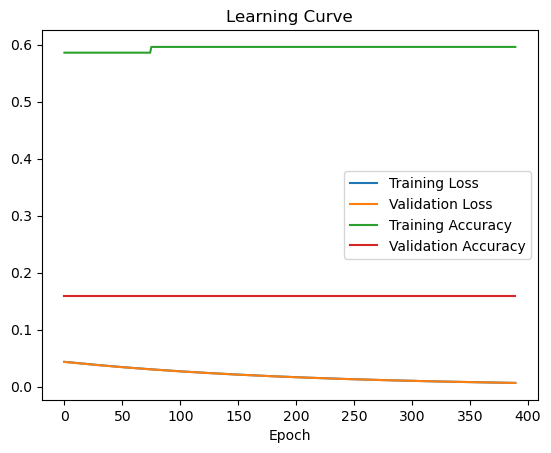

In [ ]:
# Print overall mean accuracies
print(f"\nOverall Mean Training Accuracy: {np.mean(training_accuracies):.4f}")
print(f"Overall Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Print best hyperparameters
print("\nBest Hyperparameters:")
print("Trial:", best_hyperparameters['trial'])
print("Hyperparameters:", best_hyperparameters['params'])
print("Mean Validation Accuracy:", best_hyperparameters['mean_validation_accuracy'])

# Plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.legend()
plt.show()